# Analysis for Iterated cultural transmission can promote more efficient technology through reduction in complexity by Masaki Suyama, Yo Nakawake, & Masanori Takezawa

## Summary

Below is the main analyses used to see whether the simplicity and efficiency of towers evolves as the generation progress. For study 1, there is also another analysis which test for convergence. Also, the ICC of coders who counted how many pillars are used in each towers are also analysed.

## Load packages and set graph visuals for ggplot

In [1]:
suppressWarnings(suppressMessages(library(lmerTest)))
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(ggeffects)))
suppressWarnings(suppressMessages(library(emmeans)))
suppressWarnings(suppressMessages(library(psych)))
suppressWarnings(suppressMessages(library(magrittr)))

# Set theme
apa_theme <- theme(
plot.margin = unit(c(1, 1, 1, 1), "cm"),
plot.background = element_rect(fill = "white", color = NA),
plot.title = element_text(size = 22, face = "bold",
                          hjust = 0.5,
                          margin = margin(b = 15)),
axis.line = element_line(color = "black", size = .5),
axis.title = element_text(size = 18, color = "black",
                          face = "bold"),
axis.text = element_text(size = 15, color = "black"),
axis.text.x = element_text(margin = margin(t = 10)),
axis.title.y = element_text(margin = margin(r = 10)),
axis.ticks = element_line(size = .5),
panel.grid = element_blank(),
legend.position = 'top',
legend.background = element_rect(color = "black"),
legend.text = element_text(size = 15),
legend.margin = margin(t = 5, l = 5, r = 5, b = 5),
legend.key = element_rect(color = NA, fill = NA)
)

theme_set(theme_minimal(base_size = 18) +
        apa_theme)

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


## Analyse height data from study 1

The below script analysed the data from study 1 with dependent variable being the tower height.

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Height ~ Generation * Condition + (1 | ID)
   Data: .

REML criterion at convergence: 1027.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.09698 -0.66095  0.00339  0.65753  2.07171 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  82.96    9.108  
 Residual             510.47   22.594  
Number of obs: 114, groups:  ID, 19

Fixed effects:
                         Estimate Std. Error     df t value Pr(>|t|)   
(Intercept)                29.443      8.663 90.975   3.399  0.00101 **
Generation                  6.782      2.041 93.000   3.322  0.00128 **
ConditionPair              15.371     10.901 90.975   1.410  0.16193   
Generation:ConditionPair   -4.320      2.569 93.000  -1.682  0.09598 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) Genrtn CndtnP
Generation  -0.825  

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


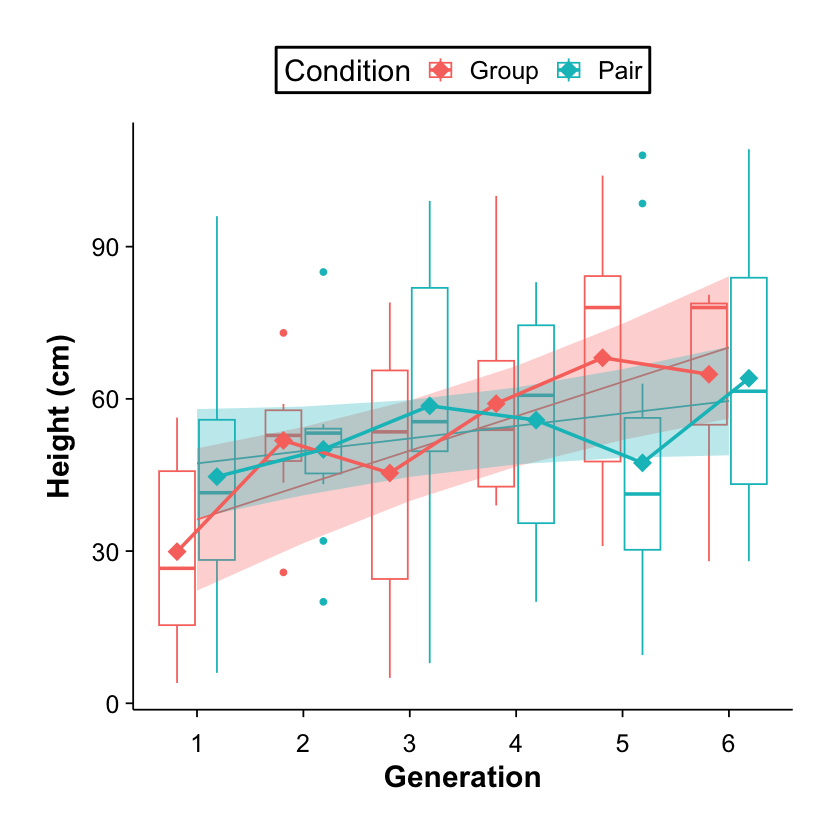

In [2]:
df <- read.csv('Study1_height.csv')
glm <- df %>% lmer(Height~Generation*Condition+(1|ID),data=.)
summary(glm)
glm_p <- ggpredict(glm, terms = c("Generation","Condition"))

# plot(glm_p,rawdata=T)
(p <-ggplot() + 
     geom_boxplot(data = df, aes(x = as.factor(Generation), y = Height, color = Condition))　+ labs(color = "Condition", x = "Generation", y= "Height (cm)") + 
     geom_line(data = glm_p, aes(x = x, y = predicted,color = group), show.legend = F) + 
     geom_ribbon(data = glm_p, aes(x = x, ymin = conf.low, ymax = conf.high,fill=group), alpha = 0.3,show.legend = F) +
     stat_summary(data = df, aes(x = as.factor(Generation), y = Height, color = Condition), fun= mean, geom="point", size = 5, shape = 18, position = position_dodge(width = .75)) + 
     stat_summary(data = df, aes(x = as.factor(Generation), y = Height, color = Condition,group=Condition), fun= mean,  geom="line", size = 1,position = position_dodge(width = .75)))
# ggsave('exp1_height.png',p)

## Analyse simplicity data from study 1

The below script analysed the data from study 1 with dependent variable being the pillars used per story.

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: Pillar ~ Condition * Generation + (1 | Session)
   Data: .
 Offset: lstory

     AIC      BIC   logLik deviance df.resid 
   983.9   1000.7   -486.9    973.9      207 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6043 -0.4051 -0.1173  0.4044  6.5052 

Random effects:
 Groups  Name        Variance Std.Dev.
 Session (Intercept) 0.3586   0.5988  
Number of obs: 212, groups:  Session, 19

Fixed effects:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.11361    0.26543   4.196 2.72e-05 ***
ConditionPair            -0.24451    0.32904  -0.743  0.45743    
Generation               -0.16530    0.03642  -4.539 5.66e-06 ***
ConditionPair:Generation  0.12442    0.04281   2.906  0.00366 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) Cn

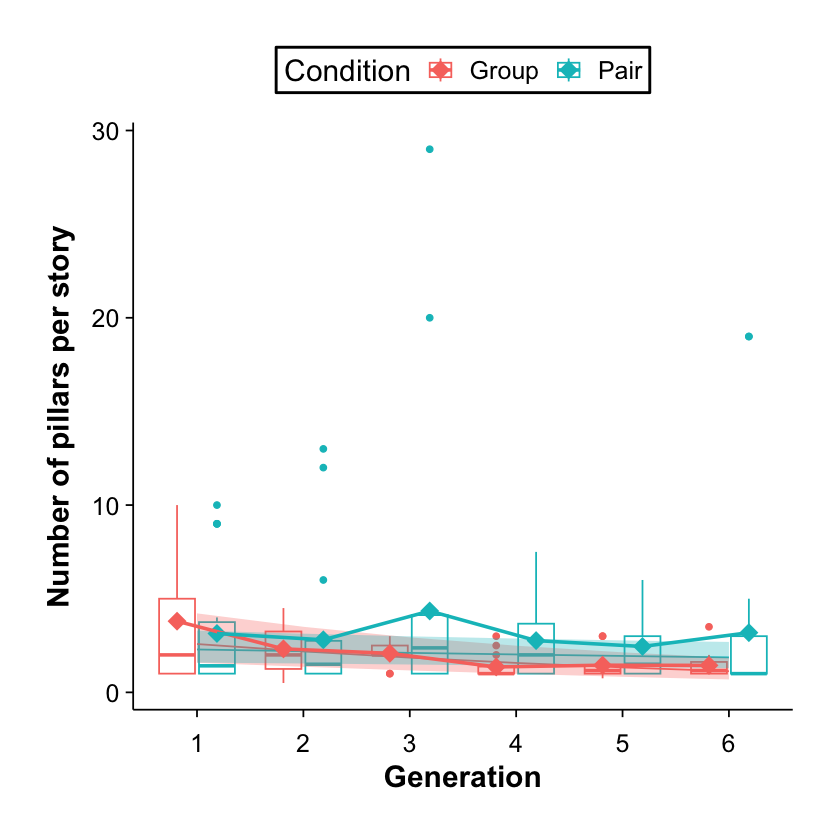

In [3]:
df_simp <- read.csv('Study1_simp.csv')
# offset pre-logged
glm1 <- df_simp %>% mutate(lstory=log(Story)) %>% glmer(Pillar~Condition*Generation+(1|Session),family=poisson(link=log),offset=lstory,data=.)
summary(glm1)
glm1_p <- ggpredict(glm1, terms = c("Generation","Condition"),fixed = "fe",bias_correction = TRUE)

# plot(glm1_p,rawdata=T)
(p <-ggplot() + 
     geom_boxplot(data=df_simp, aes(x=as.factor(Generation), y=PilDivStr, color=Condition))　+ labs(color = "Condition", x = "Generation", y= "Number of pillars per story") +
     geom_line(data = glm1_p, aes(x = x, y = predicted,color = group), show.legend = F) + 
     geom_ribbon(data = glm1_p, aes(x = x, ymin = conf.low, ymax = conf.high,fill=group), alpha = 0.3,show.legend = F) +
     stat_summary(data = df_simp, aes(x = as.factor(Generation), y = PilDivStr, color = Condition), fun = mean, geom = "point", size = 5, shape = 18, position = position_dodge(width = .75)) + 
     stat_summary(data = df_simp, aes(x = as.factor(Generation), y = PilDivStr, color = Condition, group = Condition), fun = mean,  geom ="line", size = 1,position = position_dodge(width = .75)))
# ggsave('exp1_pillars.png',p)

## ICC of the two coders

Below is the analysis which looked at the ICC in study 1.

In [4]:
df_simp %>% select(Condition,Generation,Session,ID,Pillar,Joint) %>% mutate(ID=as.factor(ID)) %>%
    pivot_wider(names_from=ID,values_from=c(Pillar,Joint)) %>%
    select(Pillar_1,Pillar_2) %>% ICC(.)

boundary (singular) fit: see help('isSingular')



Call: ICC(x = .)

Intraclass correlation coefficients 
                         type  ICC  F df1 df2       p lower bound upper bound
Single_raters_absolute   ICC1 0.94 32 105 106 2.7e-51        0.91        0.96
Single_random_raters     ICC2 0.94 32 105 105 6.9e-51        0.91        0.96
Single_fixed_raters      ICC3 0.94 32 105 105 6.9e-51        0.91        0.96
Average_raters_absolute ICC1k 0.97 32 105 106 2.7e-51        0.95        0.98
Average_random_raters   ICC2k 0.97 32 105 105 6.9e-51        0.95        0.98
Average_fixed_raters    ICC3k 0.97 32 105 105 6.9e-51        0.95        0.98

 Number of subjects = 106     Number of Judges =  2
See the help file for a discussion of the other 4 McGraw and Wong estimates,

## Analyse convergence in study 1

Below is the analysis which looked at convergence in study 1.

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Rating ~ Condition * Generation + (1 | ID)
   Data: .

REML criterion at convergence: 15079.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2080 -0.9108 -0.1924  0.7143  2.7496 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.1146   0.3385  
 Residual             1.5667   1.2517  
Number of obs: 4560, groups:  ID, 30

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)                 2.20781    0.11451  277.59658  19.281  < 2e-16 ***
ConditionPair               0.23216    0.10769 4530.89714   2.156   0.0312 *  
Generation                  0.19581    0.02375 4531.43475   8.243  < 2e-16 ***
ConditionPair:Generation   -0.20091    0.02675 4530.77273  -7.510 7.09e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) CndtnP 

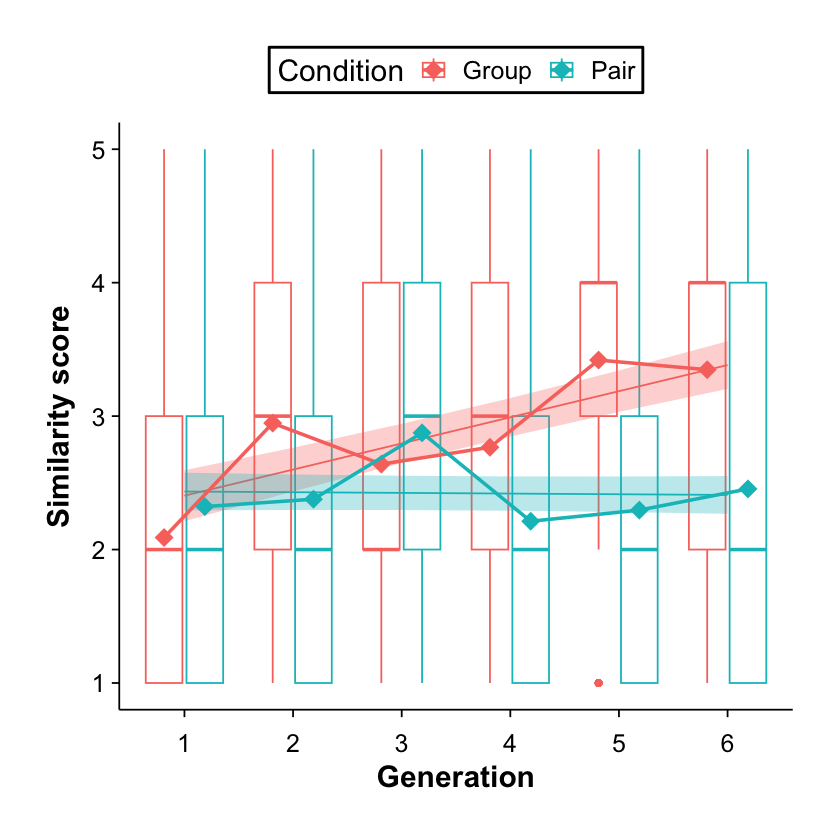

In [11]:
df_conv <- read.csv('Study1_conv.csv')
df_conv %>% lmer(Rating~Condition*Generation+(1|ID),data=.) -> glm3
summary(glm3)
glm3_p <- ggpredict(glm3, terms = c("Generation","Condition"),fixed = "fe")

# plot(glm3_p,rawdata=T)
(p <-ggplot() + 
     geom_boxplot(data=df_conv, aes(x=as.factor(Generation), y=Rating, color=Condition))　+ labs(color = "Condition", x = "Generation", y= "Similarity score") +
     geom_line(data = glm3_p, aes(x = x, y = predicted,color = group), show.legend = F) + 
     geom_ribbon(data = glm3_p, aes(x = x, ymin = conf.low, ymax = conf.high,fill=group), alpha = 0.3,show.legend = F) +
     stat_summary(data = df_conv, aes(x = as.factor(Generation), y = Rating, color = Condition), fun = mean, geom = "point", size = 5, shape = 18, position = position_dodge(width = .75)) + 
     stat_summary(data = df_conv, aes(x = as.factor(Generation), y = Rating, color = Condition, group = Condition), fun = mean,  geom ="line", size = 1,position = position_dodge(width = .75)))
# ggsave('exp1_conv.png',p)

## Analyse convergence data from study 1 with emmeans
Below is the intercept data from study 1

In [12]:
# head(df)
emm.result <- emmeans(glm3, ~ Condition, at = list(Generation=1),pbkrtest.limit = 4560)
summary(emm.result, infer=TRUE)
pairs(emm.result,pbkrtest.limit = 4560)

NOTE: Results may be misleading due to involvement in interactions



,Condition,emmean,SE,df,lower.CL,upper.CL,t.ratio,p.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Group,2.403628,0.09741438,148.80862,2.211134,2.596122,24.67426,1.864825e-54
2,Pair,2.434873,0.07220200,45.42346,2.289488,2.580258,33.72307,8.486158e-34


 contrast     estimate     SE   df t.ratio p.value
 Group - Pair  -0.0312 0.0841 4531  -0.372  0.7101

Degrees-of-freedom method: kenward-roger 

Below is that slope data from study 1 convergence

In [13]:
emm.gen <- emtrends(glm3, "Condition", var = "Generation",pbkrtest.limit = 4560)
summary(emm.gen, infer=TRUE)
pairs(emm.gen,pbkrtest.limit = 4560)

,Condition,Generation.trend,SE,df,lower.CL,upper.CL,t.ratio,p.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Group,0.195814067,0.02375511,4531.528,0.14924246,0.24238567,8.2430279,2.176720e-16
2,Pair,-0.005099051,0.01230832,4528.604,-0.02922937,0.01903127,-0.4142766,6.786912e-01


 contrast     estimate     SE   df t.ratio p.value
 Group - Pair    0.201 0.0268 4531   7.510  <.0001

Degrees-of-freedom method: kenward-roger 

## Analyse height data from study 2

Below is the analysis that looked at the height data in study 2.

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Height ~ Generation * StartStruc * GroupPair + (1 | Session)
   Data: .

REML criterion at convergence: 1327.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.87134 -0.51449  0.02982  0.63108  2.19503 

Random effects:
 Groups   Name        Variance Std.Dev.
 Session  (Intercept)  60.27    7.763  
 Residual             344.37   18.557  
Number of obs: 155, groups:  Session, 39

Fixed effects:
                                          Estimate Std. Error      df t value
(Intercept)                                 45.907      7.363 136.595   6.235
Generation                                   7.088      1.800 129.237   3.937
StartStrucSimple                            37.466     11.342 142.127   3.303
GroupPairPair                              -14.447      9.785 134.965  -1.476
Generation:StartStrucSimple                 -8.941      2.656 130.853  -3.367
Generation:GroupPair

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


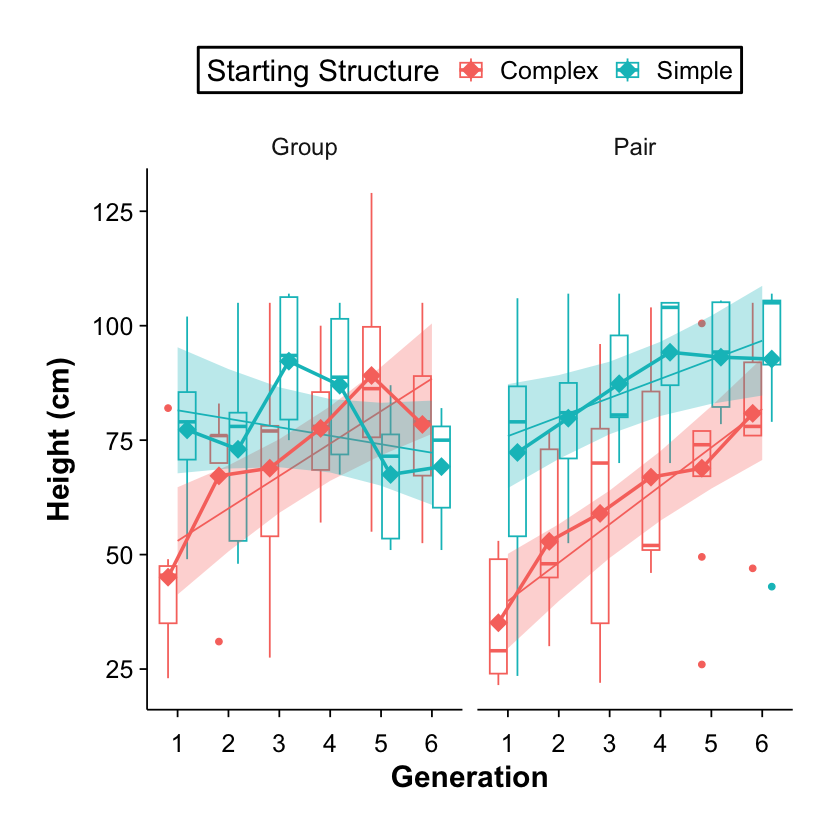

In [2]:
# head(df)
df <- read.csv('Study2_height.csv')
glm <- df %>% lmer(Height~Generation*StartStruc*GroupPair+(1|Session),data=.)
summary(glm)
glm_p <- ggpredict(glm, terms = c("Generation","StartStruc","GroupPair"))
# glm_p
glm_p %>% rename(GroupPair = facet) -> glm_p

# plot(glm_p,rawdata=T)
(p <-ggplot() + 
     geom_boxplot(data = df, aes(x = as.factor(Generation), y = Height, color = StartStruc))　+ labs(color = "Starting Structure", x = "Generation", y= "Height (cm)") + facet_grid(~StartStruc) +
     geom_line(data = glm_p, aes(x = x, y = predicted,color = group), show.legend = F) + facet_grid(~GroupPair) +
     geom_ribbon(data = glm_p, aes(x = x, ymin = conf.low, ymax = conf.high,fill=group), alpha = 0.3,show.legend = F) + facet_grid(~GroupPair) +
     stat_summary(data = df, aes(x = as.factor(Generation), y = Height, color = StartStruc, group = StartStruc), fun = mean, geom = "point", size = 5, shape = 18, position = position_dodge(width = .75)) + 
     stat_summary(data = df, aes(x = as.factor(Generation), y = Height, color = StartStruc, group = StartStruc), fun = mean,  geom ="line", size = 1,position = position_dodge(width = .75)))
# ggsave('exp2_height.png',p)

## Analyse height data from study 2 with emmeans
Below is that intercept data from study 2

In [3]:
# head(df)
fit <- lmer(Height ~ Condition * Generation +  (1|Session), data=df)
summary(fit)
emm.result <- emmeans(fit, ~ Condition, at = list(Generation=1))
summary(emm.result, infer=TRUE)
pairs(emm.result)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Height ~ Condition * Generation + (1 | Session)
   Data: df

REML criterion at convergence: 1327.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.87134 -0.51449  0.02982  0.63108  2.19503 

Random effects:
 Groups   Name        Variance Std.Dev.
 Session  (Intercept)  60.27    7.763  
 Residual             344.37   18.557  
Number of obs: 155, groups:  Session, 39

Fixed effects:
                         Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)                45.907      7.363 136.595   6.235 5.26e-09 ***
ConditionGr-S              37.466     11.342 142.127   3.303 0.001209 ** 
ConditionPr-C             -14.447      9.785 134.965  -1.476 0.142148    
ConditionPr-S              25.807     10.242 135.853   2.520 0.012907 *  
Generation                  7.088      1.800 129.237   3.937 0.000134 ***
ConditionGr-S:Generation   -8.941      2.656 130.853  -3

NOTE: Results may be misleading due to involvement in interactions



,Condition,emmean,SE,df,lower.CL,upper.CL,t.ratio,p.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Gr-C,52.99510,5.946707,103.8926,41.20242,64.78779,8.911672,1.815213e-14
2,Gr-S,81.52017,6.999291,130.3698,67.67328,95.36706,11.646918,6.257777e-22
3,Pr-C,39.85197,5.225627,93.4795,29.47561,50.22833,7.626255,1.980073e-11
4,Pr-S,75.88327,5.768206,102.1160,64.44222,87.32433,13.155437,1.029994e-23


 contrast        estimate   SE    df t.ratio p.value
 (Gr-C) - (Gr-S)   -28.53 9.18 119.7  -3.106  0.0125
 (Gr-C) - (Pr-C)    13.14 7.92  99.3   1.660  0.3502
 (Gr-C) - (Pr-S)   -22.89 8.28 103.0  -2.763  0.0338
 (Gr-S) - (Pr-C)    41.67 8.73 117.5   4.770  <.0001
 (Gr-S) - (Pr-S)     5.64 9.07 119.4   0.621  0.9250
 (Pr-C) - (Pr-S)   -36.03 7.78  98.2  -4.629  0.0001

Degrees-of-freedom method: kenward-roger 
P value adjustment: tukey method for comparing a family of 4 estimates 

x,predicted,std.error,conf.low,conf.high,group,GroupPair,StartStruc
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
1,52.99510,5.930821,41.27308,64.71713,Gr-C,Group,Complex
1,81.52017,6.964673,67.75477,95.28556,Gr-S,Group,Simple
1,39.85197,5.220852,29.53316,50.17077,Pr-C,Pair,Complex
1,75.88327,5.745553,64.52742,87.23913,Pr-S,Pair,Simple
2,60.08274,4.756445,50.68182,69.48367,Gr-C,Group,Complex
2,79.66685,5.495693,68.80483,90.52887,Gr-S,Group,Simple


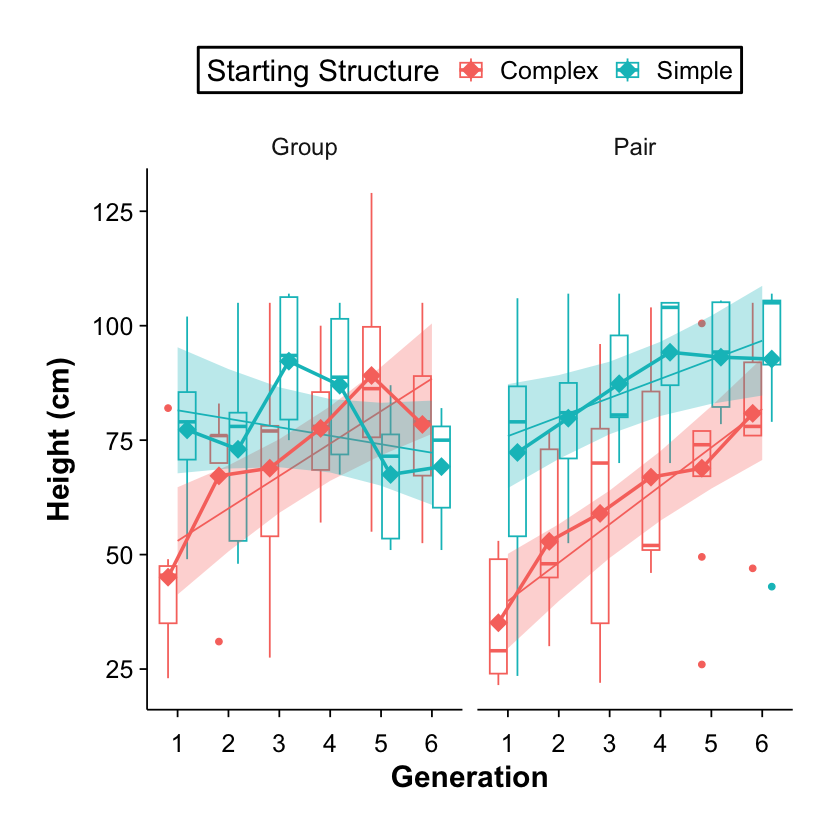

In [5]:
glm_p <- ggpredict(fit, terms = c("Generation","Condition"))
glm_p %<>% as_tibble() %>% mutate(GroupPair = case_when(group == 'Gr-C' | group == 'Gr-S' ~ 'Group', TRUE ~ 'Pair'),
                                 StartStruc = case_when(group == 'Gr-C' | group == 'Pr-C' ~ 'Complex', TRUE ~ 'Simple'))
head(glm_p)
# plot(glm_p,rawdata=T)
(p <-ggplot() + 
     geom_boxplot(data = df, aes(x = as.factor(Generation), y = Height, color = StartStruc))　+ labs(color = "Starting Structure", x = "Generation", y= "Height (cm)") + facet_grid(~StartStruc) +
     geom_line(data = glm_p, aes(x = x, y = predicted,color = StartStruc), show.legend = F) + facet_grid(~GroupPair) +
     geom_ribbon(data = glm_p, aes(x = x, ymin = conf.low, ymax = conf.high,fill=StartStruc), alpha = 0.3,show.legend = F) + facet_grid(~GroupPair) +
     stat_summary(data = df, aes(x = as.factor(Generation), y = Height, color = StartStruc, group = StartStruc), fun = mean, geom = "point", size = 5, shape = 18, position = position_dodge(width = .75)) + 
     stat_summary(data = df, aes(x = as.factor(Generation), y = Height, color = StartStruc, group = StartStruc), fun = mean,  geom ="line", size = 1,position = position_dodge(width = .75)))
# ggsave('exp2_height2.png',p)

Below is that slope data from study 2

In [29]:
emm.gen <- emtrends(fit, "Condition", var = "Generation")
summary(emm.gen, infer=TRUE)
pairs(emm.gen)

,Condition,Generation.trend,SE,df,lower.CL,upper.CL,t.ratio,p.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Gr-C,7.087639,1.808888,128.7041,3.508632,10.666646,3.9182301,1.440810e-04
2,Gr-S,-1.853316,1.962545,131.7345,-5.735496,2.028863,-0.9443436,3.467229e-01
3,Pr-C,8.391452,1.595721,123.0486,5.232833,11.550072,5.2587221,6.209140e-07
4,Pr-S,4.169268,1.759372,126.2431,0.687588,7.650949,2.3697481,1.931522e-02


 contrast        estimate   SE  df t.ratio p.value
 (Gr-C) - (Gr-S)     8.94 2.67 130   3.350  0.0058
 (Gr-C) - (Pr-C)    -1.30 2.41 126  -0.541  0.9489
 (Gr-C) - (Pr-S)     2.92 2.52 128   1.157  0.6552
 (Gr-S) - (Pr-C)   -10.24 2.53 128  -4.050  0.0005
 (Gr-S) - (Pr-S)    -6.02 2.64 129  -2.285  0.1069
 (Pr-C) - (Pr-S)     4.22 2.38 125   1.778  0.2890

Degrees-of-freedom method: kenward-roger 
P value adjustment: tukey method for comparing a family of 4 estimates 

## Analyse simplicity data from study 2

Below is the GLMM data which looked at simplicity from study 2.

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: Pillar ~ Generation * StartStruc * GroupPair + (1 | Session) +  
    (1 | ID)
   Data: .
 Offset: lstory

     AIC      BIC   logLik deviance df.resid 
  1618.3   1655.2   -799.1   1598.3      288 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5842 -0.5519 -0.0388  0.5692  5.8956 

Random effects:
 Groups  Name        Variance Std.Dev.
 Session (Intercept) 0.160156 0.40020 
 ID      (Intercept) 0.001503 0.03877 
Number of obs: 298, groups:  Session, 39; ID, 3

Fixed effects:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                                2.02504    0.16225  12.481  < 2e-16
Generation                                -0.27936    0.02646 -10.558  < 2e-16
StartStrucSimple                          -1.22764    0.24631  -4.984 6.22e-07
GroupPairPair                             -0.04730    0.2

You are calculating adjusted predictions on the population-level (i.e.
  `type = "fixed"`) for a *generalized* linear mixed model.
  This may produce biased estimates due to Jensen's inequality. Consider
  setting `bias_correction = TRUE` to correct for this bias.
  See also the documentation of the `bias_correction` argument.



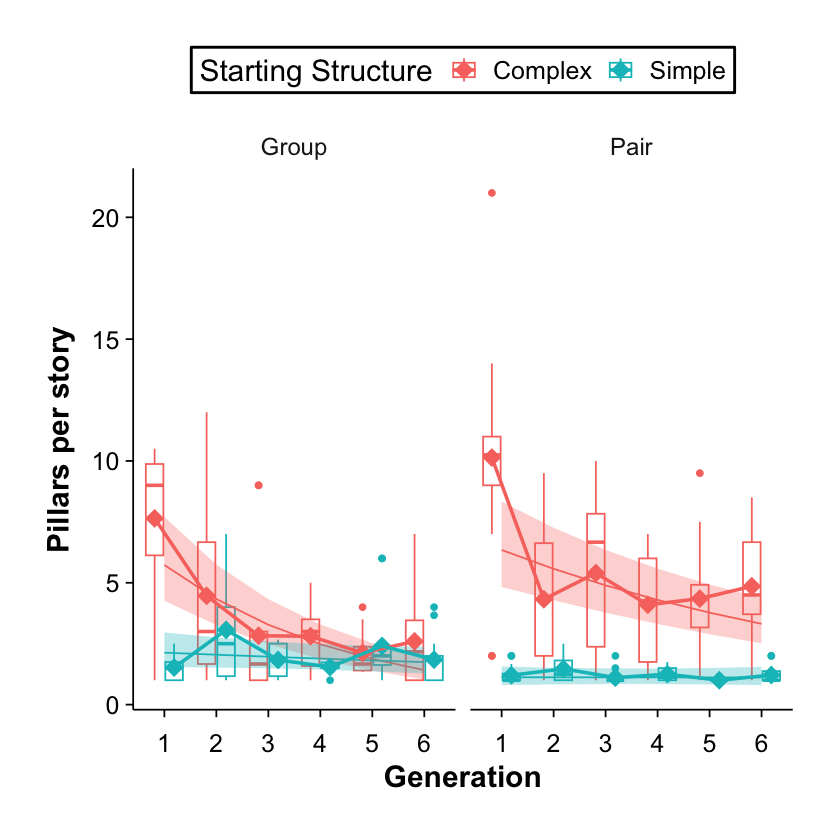

In [6]:
df_simp <- read.csv('Study2_simp.csv')
# offset pre-logged
# head(df_simp)
df_simp %>% mutate(PilDivStr = Pillar/Story, JoiDivStr = Joint/Story) -> df_simp
glm1 <- df_simp %>% mutate(lstory=log(Story)) %>% glmer(Pillar~Generation*StartStruc*GroupPair+(1|Session)+(1|ID),family=poisson(link=log),offset=lstory,data=.)
summary(glm1)

glm1_p <- ggpredict(glm1, terms = c("Generation","StartStruc","GroupPair"))
glm1_p %>% rename(GroupPair = facet) -> glm1_p
# glm1_p

# plot(glm1_p,rawdata=T)
(p <-ggplot() + 
     geom_boxplot(data = df_simp, aes(x = as.factor(Generation), y = PilDivStr, color = StartStruc))　+ labs(color = "Starting Structure", x = "Generation", y= "Pillars per story") + facet_grid(~GroupPair) +
     geom_line(data = glm1_p, aes(x = x, y = predicted, color = group), show.legend = F) + 
     geom_ribbon(data = glm1_p, aes(x = x, ymin = conf.low, ymax = conf.high,fill=group), alpha = 0.3,show.legend = F) + facet_wrap(~GroupPair) +
     stat_summary(data = df_simp, aes(x = as.factor(Generation), y = PilDivStr, color = StartStruc, group = StartStruc), fun = mean, geom = "point", size = 5, shape = 18, position = position_dodge(width = .75)) + 
     stat_summary(data = df_simp, aes(x = as.factor(Generation), y = PilDivStr, color = StartStruc, group = StartStruc), fun = mean,  geom ="line", size = 1,position = position_dodge(width = .75)))
     
# ggsave('exp2_pillars.png',p)

## Analyse simplicity data from study 2 with emmeans
Below is the intercept data from study 2 with parts used per story as dependent variable.

In [7]:
# head(df_simp)
df_simp %>% mutate(Cond=if_else(Condition==1,'Gr-S',
                        if_else(Condition==2,'Gr-C',
                        if_else(Condition==3, 'Pr-S', 'Pr-C')))) -> df_simp
glm1 <- df_simp %>% mutate(lstory=log(Story)) %>% glmer(Pillar~Generation*Cond+(1|Session)+(1|ID),family=poisson(link=log),offset=lstory,data=.)
emm.result1 <- emmeans(glm1, ~ Cond, at = list(Generation=1))
summary(emm.result1, infer=TRUE)
pairs(emm.result1)

summary(glm1)

NOTE: Results may be misleading due to involvement in interactions



,Cond,emmean,SE,df,asymp.LCL,asymp.UCL,z.ratio,p.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Gr-C,2.726914,0.1511777,Inf,2.4306110,3.023217,18.037804,9.837624e-73
2,Gr-S,1.738393,0.1674894,Inf,1.4101201,2.066667,10.379123,3.085979e-25
3,Pr-C,2.829050,0.1392038,Inf,2.5562157,3.101885,20.323085,8.036328e-92
4,Pr-S,1.096386,0.1697646,Inf,0.7636534,1.429118,6.458272,1.059054e-10


 contrast        estimate    SE  df z.ratio p.value
 (Gr-C) - (Gr-S)    0.989 0.223 Inf   4.426  0.0001
 (Gr-C) - (Pr-C)   -0.102 0.203 Inf  -0.503  0.9584
 (Gr-C) - (Pr-S)    1.631 0.225 Inf   7.241  <.0001
 (Gr-S) - (Pr-C)   -1.091 0.215 Inf  -5.061  <.0001
 (Gr-S) - (Pr-S)    0.642 0.236 Inf   2.716  0.0335
 (Pr-C) - (Pr-S)    1.733 0.217 Inf   7.980  <.0001

Results are given on the log (not the response) scale. 
P value adjustment: tukey method for comparing a family of 4 estimates 

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: Pillar ~ Generation * Cond + (1 | Session) + (1 | ID)
   Data: .
 Offset: lstory

     AIC      BIC   logLik deviance df.resid 
  1618.3   1655.2   -799.1   1598.3      288 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5842 -0.5519 -0.0388  0.5693  5.8956 

Random effects:
 Groups  Name        Variance Std.Dev.
 Session (Intercept) 0.160153 0.40019 
 ID      (Intercept) 0.001503 0.03877 
Number of obs: 298, groups:  Session, 39; ID, 3

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          2.02503    0.16225  12.481  < 2e-16 ***
Generation          -0.27936    0.02646 -10.558  < 2e-16 ***
CondGr-S            -1.22766    0.24631  -4.984 6.22e-07 ***
CondPr-C            -0.04732    0.21585  -0.219    0.826    
CondPr-S            -1.90839    0.24871  -7.673 1.68e-14 ***
Generation:CondGr-S  0.23914   

x,predicted,std.error,conf.low,conf.high,group,GroupPair,StartStruc
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
1,5.729746,0.1512016,4.2602227,7.706167,Gr-C,Group,Complex
1,2.132192,0.1677758,1.5346711,2.962357,Gr-S,Group,Simple
1,6.345891,0.1391839,4.8307997,8.336162,Pr-C,Pair,Complex
1,1.122034,0.1699653,0.8041394,1.565600,Pr-S,Pair,Simple
2,4.333217,0.1441582,3.2666511,5.748018,Gr-C,Group,Complex
2,2.048137,0.1517544,1.5211972,2.757609,Gr-S,Group,Simple


Warning message in plot.window(...):
“"rawdata" はグラフィックスパラメータではありません”
Warning message in plot.xy(xy, type, ...):
“"rawdata" はグラフィックスパラメータではありません”
Warning message in title(...):
“"rawdata" はグラフィックスパラメータではありません”
Warning message in plot.window(...):
“"rawdata" はグラフィックスパラメータではありません”
Warning message in plot.xy(xy, type, ...):
“"rawdata" はグラフィックスパラメータではありません”
Warning message in title(...):
“"rawdata" はグラフィックスパラメータではありません”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"rawdata" はグラフィックスパラメータではありません”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"rawdata" はグラフィックスパラメータではありません”
Warning message in plot.window(...):
“"rawdata" はグラフィックスパラメータではありません”
Warning message in plot.xy(xy, type, ...):
“"rawdata" はグラフィックスパラメータではありません”
Warning message in title(...):
“"rawdata" はグラフィックスパラメータではありません”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"rawdata" はグラフィックスパラメータではありません”
Warning message in plot.window(...):
“"rawdata" はグラフィックスパラメータではありません”
Warnin

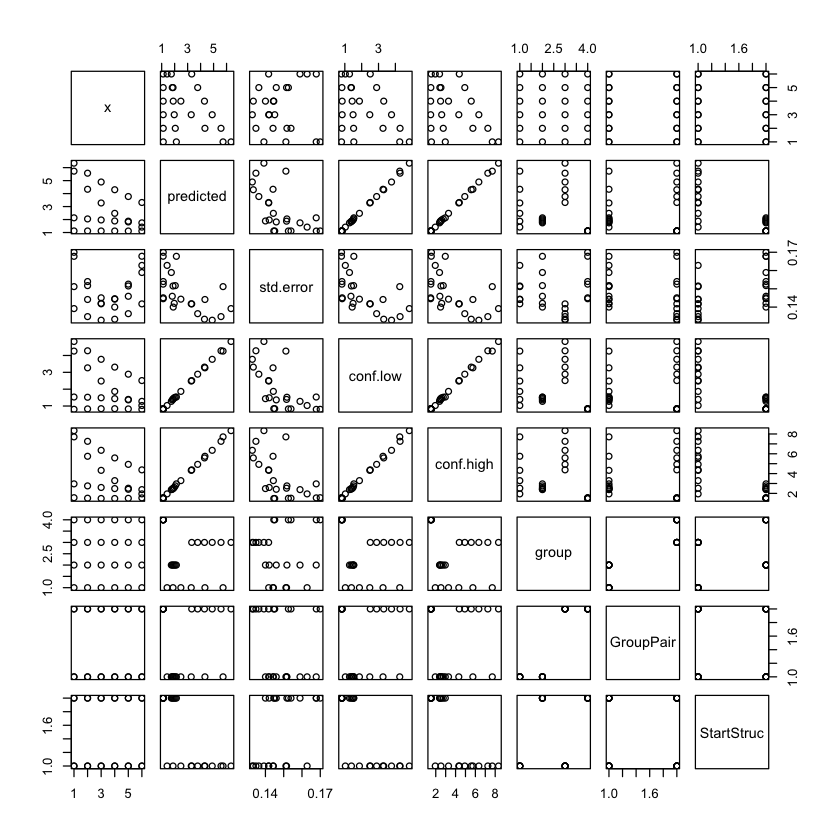

Saving 7 x 7 in image


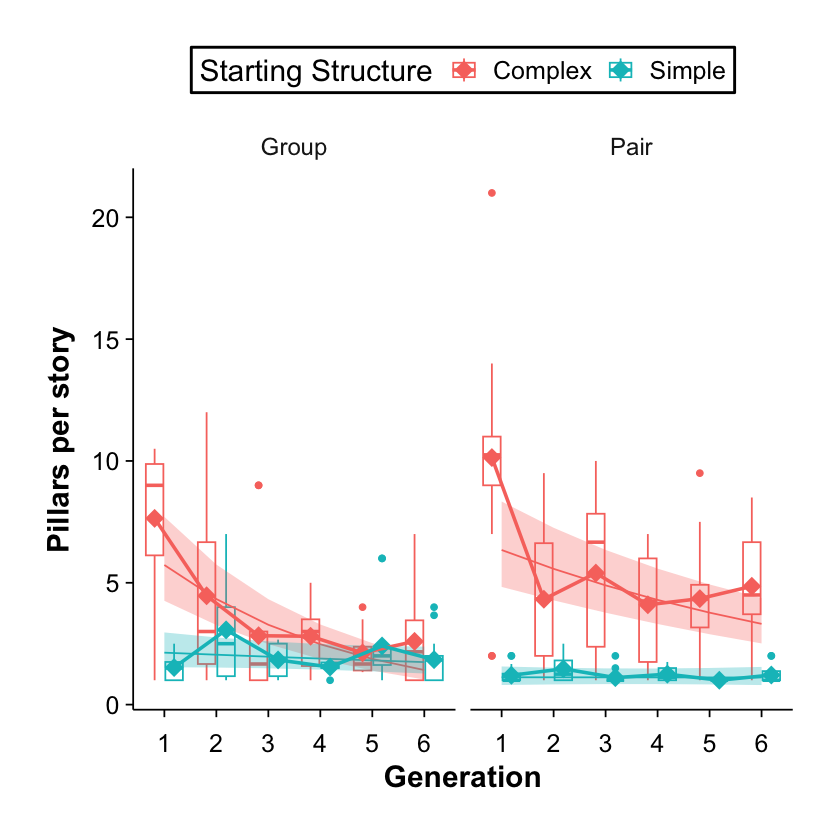

In [13]:
glm_p <- ggpredict(glm1, terms = c("Generation","Cond"))
glm_p %<>% as_tibble() %>% mutate(GroupPair = case_when(group == 'Gr-C' | group == 'Gr-S' ~ 'Group', TRUE ~ 'Pair'),
                                 StartStruc = case_when(group == 'Gr-C' | group == 'Pr-C' ~ 'Complex', TRUE ~ 'Simple'))
head(glm_p)
# plot(glm_p,rawdata=T)
(p <-ggplot() + 
     geom_boxplot(data = df_simp, aes(x = as.factor(Generation), y = PilDivStr, color = StartStruc))　+ labs(color = "Starting Structure", x = "Generation", y= "Pillars per story") + facet_grid(~GroupPair) +
     geom_line(data = glm_p, aes(x = x, y = predicted,color = StartStruc), show.legend = F) + facet_grid(~GroupPair) +
     geom_ribbon(data = glm_p, aes(x = x, ymin = conf.low, ymax = conf.high,fill=StartStruc), alpha = 0.3,show.legend = F) + facet_grid(~GroupPair) +
     stat_summary(data = df_simp, aes(x = as.factor(Generation), y = PilDivStr, color = StartStruc, group = StartStruc), fun = mean, geom = "point", size = 5, shape = 18, position = position_dodge(width = .75)) + 
     stat_summary(data = df_simp, aes(x = as.factor(Generation), y = PilDivStr, color = StartStruc, group = StartStruc), fun = mean,  geom ="line", size = 1,position = position_dodge(width = .75)))
# ggsave('exp2_simplicity2.png',p)

Below is the slope data from study 2 with parts used per story as dependent variable.

In [27]:
emm.gen <- emtrends(glm1, "Cond", var = "Generation")
summary(emm.gen, infer=TRUE)
pairs(emm.gen)

,Cond,Generation.trend,SE,df,asymp.LCL,asymp.UCL,z.ratio,p.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Gr-C,-0.27936097,0.02645900,Inf,-0.33121965,-0.22750229,-10.55826001,4.652049e-26
2,Gr-S,-0.04021982,0.03354705,Inf,-0.10597082,0.02553118,-1.19890789,2.305638e-01
3,Pr-C,-0.12990792,0.01830130,Inf,-0.16577780,-0.09403804,-7.09829092,1.263091e-12
4,Pr-S,-0.00149700,0.03531382,Inf,-0.07071082,0.06771682,-0.04239134,9.661867e-01


 contrast        estimate     SE  df z.ratio p.value
 (Gr-C) - (Gr-S)  -0.2391 0.0427 Inf  -5.602  <.0001
 (Gr-C) - (Pr-C)  -0.1495 0.0322 Inf  -4.642  <.0001
 (Gr-C) - (Pr-S)  -0.2779 0.0442 Inf  -6.281  <.0001
 (Gr-S) - (Pr-C)   0.0897 0.0382 Inf   2.347  0.0877
 (Gr-S) - (Pr-S)  -0.0387 0.0488 Inf  -0.794  0.8571
 (Pr-C) - (Pr-S)  -0.1284 0.0397 Inf  -3.231  0.0068

P value adjustment: tukey method for comparing a family of 4 estimates 

## ICC of the three coders

In [28]:
df_simp %>% select(Condition,Generation,Session,ID,Pillar,Joint) %>% mutate(ID=as.factor(ID)) %>%
    pivot_wider(names_from=ID,values_from=c(Pillar,Joint)) %>%
    select(Pillar_1,Pillar_2) %>% ICC(.)

Call: ICC(x = .)

Intraclass correlation coefficients 
                         type  ICC   F df1 df2        p lower bound upper bound
Single_raters_absolute   ICC1 0.98 105 148 149 1.7e-108        0.97        0.99
Single_random_raters     ICC2 0.98 155 148 148 3.2e-120        0.94        0.99
Single_fixed_raters      ICC3 0.99 155 148 148 3.2e-120        0.98        0.99
Average_raters_absolute ICC1k 0.99 105 148 149 1.7e-108        0.99        0.99
Average_random_raters   ICC2k 0.99 155 148 148 3.2e-120        0.97        1.00
Average_fixed_raters    ICC3k 0.99 155 148 148 3.2e-120        0.99        1.00

 Number of subjects = 149     Number of Judges =  2
See the help file for a discussion of the other 4 McGraw and Wong estimates,